# INFO-F-422 -  Statistical Foundations of Machine Learning 

### Student 1 - __[antoine.bedaton@ulb.be](mailto:antoine.bedaton@ulb.be) - Student ID 459482__
### Student 2 - __[pierre.defraene@ulb.be](mailto:pierre.defraene@ulb.be) - Student ID 463941__
### Student 3 - __[nathan.marotte@ulb.be](mailto:nathan.marotte@ulb.be) - Student ID 459274__

### Video presentation: www.youtube.com/abcd1234

## Project Title


# Introduction

librairies utilisées todo

In [1]:
library("tidyverse")

── Attaching packages ──────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────── tidyverse 1.3.1 ──

✔ ggplot2 3.3.3     ✔ purrr   0.3.4
✔ tibble  3.1.1     ✔ dplyr   1.0.5
✔ tidyr   1.1.3     ✔ stringr 1.4.0
✔ readr   1.4.0     ✔ forcats 0.5.1

── Conflicts ─────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()



# Data preprocessing

Before starting the project, we need to make sure to keep only the necessary data. In order to do that, we first started to check if there we columns that were 100% equals. To do so, we created a function called $check\_all\_equal$ that will create a combinaison of all the columns of the dataset and will compare them using the $identical$ R function. We noticed that only 2 columns were 100% equals, "quantity" and "quantity_group". Therefore, we decided to remove the "quantity_group" column.

After the first parsing done, we notice that there was still some culumns that were close from being equal but they sometimes differ in one word. For example, the column "payment" and "payment_type" are always the same, they just differ in the notation.




We will first look at all the columns and safely remove all the columns that only have 1 possibility for the row, for exemple in column `recorded_by`, the row is always `GeoData Consultants Ltd`. This can be checked with

In [2]:
training_set_labels <- read.csv(file = 'data/training_set_labels.csv')
test_set_values <- read.csv(file = 'data/test_set_values.csv')
training_set_values <- read.csv(file = 'data/training_set_values.csv')

#training_set_labels
summary(test_set_values)

       id          amount_tsh          date_recorded  
 Min.   :   10   Min.   :     0.0   2013-02-03:  138  
 1st Qu.:18727   1st Qu.:     0.0   2011-03-16:  137  
 Median :37362   Median :     0.0   2011-03-17:  137  
 Mean   :37162   Mean   :   322.8   2011-03-18:  130  
 3rd Qu.:55800   3rd Qu.:    25.0   2011-03-14:  129  
 Max.   :74249   Max.   :200000.0   2011-03-15:  122  
                                    (Other)   :14057  
                    funder       gps_height          installer   
 Government Of Tanzania:2215   Min.   : -57.0   DWE       :4349  
                       : 869   1st Qu.:   0.0             : 877  
 Danida                : 793   Median : 344.0   Government: 457  
 Hesawa                : 580   Mean   : 655.1   RWE       : 292  
 World Bank            : 352   3rd Qu.:1308.0   Commu     : 287  
 Kkkt                  : 336   Max.   :2777.0   DANIDA    : 255  
 (Other)               :9705                    (Other)   :8333  
   longitude        latitude    

In [3]:
for (colname in names(training_set_values)) {
    if (nrow(unique(training_set_values[colname])) == 1){
        print(paste("the column", colname, "has always the same value"))
    }
}
training_set_values <- training_set_values[,setdiff(colnames(training_set_values),"recorded_by")] # remove recorded_by
training_set_values

[1] "the column recorded_by has always the same value"


id,amount_tsh,date_recorded,funder,gps_height,installer,longitude,latitude,wpt_name,num_private,⋯,payment_type,water_quality,quality_group,quantity,quantity_group,source,source_type,source_class,waterpoint_type,waterpoint_type_group
<int>,<dbl>,<fct>,<fct>,<int>,<fct>,<dbl>,<dbl>,<fct>,<int>,⋯,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>
69572,6000,2011-03-14,Roman,1390,Roman,34.93809,-9.85632177,none,0,⋯,annually,soft,good,enough,enough,spring,spring,groundwater,communal standpipe,communal standpipe
8776,0,2013-03-06,Grumeti,1399,GRUMETI,34.69877,-2.14746569,Zahanati,0,⋯,never pay,soft,good,insufficient,insufficient,rainwater harvesting,rainwater harvesting,surface,communal standpipe,communal standpipe
34310,25,2013-02-25,Lottery Club,686,World vision,37.46066,-3.82132853,Kwa Mahundi,0,⋯,per bucket,soft,good,enough,enough,dam,dam,surface,communal standpipe multiple,communal standpipe
67743,0,2013-01-28,Unicef,263,UNICEF,38.48616,-11.15529772,Zahanati Ya Nanyumbu,0,⋯,never pay,soft,good,dry,dry,machine dbh,borehole,groundwater,communal standpipe multiple,communal standpipe
19728,0,2011-07-13,Action In A,0,Artisan,31.13085,-1.82535885,Shuleni,0,⋯,never pay,soft,good,seasonal,seasonal,rainwater harvesting,rainwater harvesting,surface,communal standpipe,communal standpipe
9944,20,2011-03-13,Mkinga Distric Coun,0,DWE,39.17280,-4.76558728,Tajiri,0,⋯,per bucket,salty,salty,enough,enough,other,other,unknown,communal standpipe multiple,communal standpipe
19816,0,2012-10-01,Dwsp,0,DWSP,33.36241,-3.76636472,Kwa Ngomho,0,⋯,never pay,soft,good,enough,enough,machine dbh,borehole,groundwater,hand pump,hand pump
54551,0,2012-10-09,Rwssp,0,DWE,32.62062,-4.22619802,Tushirikiane,0,⋯,unknown,milky,milky,enough,enough,shallow well,shallow well,groundwater,hand pump,hand pump
53934,0,2012-11-03,Wateraid,0,Water Aid,32.71110,-5.14671181,Kwa Ramadhan Musa,0,⋯,never pay,salty,salty,seasonal,seasonal,machine dbh,borehole,groundwater,hand pump,hand pump


Given the huge amount of data we have, we can also look through the column in which only one value appear most of the time, and drop the column if this number is very high. For exemple, in the column `num_private`, the value `0` appears the most in this dataset(58643/757), we could then simply assume that it is always 0. Considering that, this column don't give us very information and furthermore, we don't have a clear definition of this variable in this dataset.

In [4]:
table(training_set_values["num_private"] == 0)


FALSE  TRUE 
  757 58643 

We can automate this process by looking at the difference between the number of occurences of the most and the least common value for all the columns

In [5]:
#differences <- data.frame(matrix(ncol = 2, nrow = 0))

#for (colname in names(training_set_values)) {
#    maximum <- max(table(training_set_values[colname]))
#    minimum <- min(table(training_set_values[colname]))
#    differences <- rbind(differences, c((maximum-minimum)/59400, colname))
#}
#names(differences) <- c('Difference', 'col_name')
#differences <- differences[order(differences$Difference, decreasing=TRUE),]
#differences


As we can see, only `num_private` has a very high ratio of one value to the rest, so we will only remove the rows for that columns.
We will remove all the rows that contain the value that appears the most in the column `num_private`

In [6]:
#old_count <- nrow(training_set_values)

In [7]:
#argmax <- tail(names(sort(table(training_set_values$num_private))), 1)  # Finds the value that appear the most
#training_set_values = filter(training_set_values, num_private == argmax)  # Filter and keep all the values equal to one
#print(paste("The number of rows of the dataset has been reduced by", 100*(old_count - nrow(training_set_values))/59400, "%"))

## Missing value imputation

## Feature engineering

## Feature selection

In [8]:
options(repr.matrix.max.rows=10, repr.matrix.max.cols=100)
#Read the dataset to the variable training_set_labels

# Adds en empty column functional_need_repairs
#training_set_labels <- cbind(training_set_labels, "non_functional" = 0)
# Adds en empty column functional_need_repairs
#training_set_labels <- cbind(training_set_labels, "functional_need_repairs" = 0)
# Adds an empty column functional
#training_set_labels <- cbind(training_set_labels, "functional" = 0)

# Put 1 in the column depending on the status_group
#training_set_labels$non_functional <- ifelse(training_set_labels$status_group == "non functional", 1, 0)
#training_set_labels$functional_need_repairs <- ifelse(training_set_labels$status_group == "functional need repairs", 1, 0)
#training_set_labels$functional <- ifelse(training_set_labels$status_group == "functional", 1, 0)


# print("start")
# for (col1 in 2:ncol(training_set_values)-1) {
#     for (col2 in col1:ncol(training_set_values)) {
#         if (col1 != col2) {
# #             print(col1)
# #             print(col2)
# #             print(length(training_set_values[, col1]))
# #             print(length(training_set_values[, col2]))
#             print(table(training_set_values[, col1], training_set_values[, col2]))
#         }
#     }
# }


# interesting_column_name <- c(
#     c("waterpoint_type_group", "waterpoint_type"), 
#     c("source_type", "source_class"), 
#     c("source", "source_type"),
#     c("water_quality", "quality_group"),
#     c("quantity", "quantity_group"),
#     c("extraction_type", "extraction_group_type"),
#     c("extraction_type", "extraction_type_class")
#     c("payment", "payment_type"),
#     c("management", "management_group"),
#     c("region", "region_code"),
#     c("basin", "subvillage"))

 #table(training_set_values$waterpoint_type_group, training_set_values$waterpoint_type)  # less information
training_set_values <- training_set_values[,setdiff(colnames(training_set_values),"waterpoint_type_group")]
 #table(training_set_values$source_type, training_set_values$source_class)  # less information
training_set_values <- training_set_values[,setdiff(colnames(training_set_values),"source_class")]
 #table(training_set_values$source, training_set_values$source_type)  # less information
training_set_values <- training_set_values[,setdiff(colnames(training_set_values),"source_type")]
 #table(training_set_values$water_quality, training_set_values$quality_group)  # less information
training_set_values <- training_set_values[,setdiff(colnames(training_set_values),"quality_group")]
 #table(training_set_values$quantity, training_set_values$quantity_group)  # equivalent, we delete column
training_set_values <- training_set_values[,setdiff(colnames(training_set_values),"quantity_group")]
 #table(training_set_values$extraction_type, training_set_values$extraction_type_group)  # we can delete column
training_set_values <- training_set_values[,setdiff(colnames(training_set_values),"extraction_type_group")]
 #table(training_set_values$extraction_type, training_set_values$extraction_type_class)  # We can delete column
training_set_values <- training_set_values[,setdiff(colnames(training_set_values),"extraction_type_class")]
# table(training_set_values$payment, training_set_values$payment_type)  # equivalent,  we delete column
training_set_values <- training_set_values[,setdiff(colnames(training_set_values),"payement_type")]
 #table(training_set_values$management, training_set_values$management_group)  # we delete column
training_set_values <- training_set_values[,setdiff(colnames(training_set_values),"management_group")]
 #table(training_set_values$region, training_set_values$region_code)  # very correlated but some cities/code are ambigius
# table(training_set_values$basin, training_set_values$subvillage)  # not really correlated, keep


# head(training_set_values)
names(training_set_values)
length(names(training_set_values))
#training_set_values[-c(40, 38, 37, 33, 35, 26, 27, 31, 29, 14, 12)]
training_set_values
# subvillage > region 
training_set_labels


[1] "id"                "amount_tsh"        "date_recorded"    
 [4] "funder"            "gps_height"        "installer"        
 [7] "longitude"         "latitude"          "wpt_name"         
[10] "num_private"       "basin"             "subvillage"       
[13] "region"            "region_code"       "district_code"    
[16] "lga"               "ward"              "population"       
[19] "public_meeting"    "scheme_management" "scheme_name"      
[22] "permit"            "construction_year" "extraction_type"  
[25] "management"        "payment"           "payment_type"     
[28] "water_quality"     "quantity"          "source"           
[31] "waterpoint_type"

[1] 31

id,amount_tsh,date_recorded,funder,gps_height,installer,longitude,latitude,wpt_name,num_private,basin,subvillage,region,region_code,district_code,lga,ward,population,public_meeting,scheme_management,scheme_name,permit,construction_year,extraction_type,management,payment,payment_type,water_quality,quantity,source,waterpoint_type
<int>,<dbl>,<fct>,<fct>,<int>,<fct>,<dbl>,<dbl>,<fct>,<int>,<fct>,<fct>,<fct>,<int>,<int>,<fct>,<fct>,<int>,<fct>,<fct>,<fct>,<fct>,<int>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>
69572,6000,2011-03-14,Roman,1390,Roman,34.93809,-9.856322,none,0,Lake Nyasa,Mnyusi B,Iringa,11,5,Ludewa,Mundindi,109,True,VWC,Roman,False,1999,gravity,vwc,pay annually,annually,soft,enough,spring,communal standpipe
8776,0,2013-03-06,Grumeti,1399,GRUMETI,34.69877,-2.147466,Zahanati,0,Lake Victoria,Nyamara,Mara,20,2,Serengeti,Natta,280,,Other,,True,2010,gravity,wug,never pay,never pay,soft,insufficient,rainwater harvesting,communal standpipe
34310,25,2013-02-25,Lottery Club,686,World vision,37.46066,-3.821329,Kwa Mahundi,0,Pangani,Majengo,Manyara,21,4,Simanjiro,Ngorika,250,True,VWC,Nyumba ya mungu pipe scheme,True,2009,gravity,vwc,pay per bucket,per bucket,soft,enough,dam,communal standpipe multiple
67743,0,2013-01-28,Unicef,263,UNICEF,38.48616,-11.155298,Zahanati Ya Nanyumbu,0,Ruvuma / Southern Coast,Mahakamani,Mtwara,90,63,Nanyumbu,Nanyumbu,58,True,VWC,,True,1986,submersible,vwc,never pay,never pay,soft,dry,machine dbh,communal standpipe multiple
19728,0,2011-07-13,Action In A,0,Artisan,31.13085,-1.825359,Shuleni,0,Lake Victoria,Kyanyamisa,Kagera,18,1,Karagwe,Nyakasimbi,0,True,,,True,0,gravity,other,never pay,never pay,soft,seasonal,rainwater harvesting,communal standpipe
⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮
60739,10,2013-05-03,Germany Republi,1210,CES,37.16981,-3.253847,Area Three Namba 27,0,Pangani,Kiduruni,Kilimanjaro,3,5,Hai,Masama Magharibi,125,True,Water Board,Losaa Kia water supply,True,1999,gravity,water board,pay per bucket,per bucket,soft,enough,spring,communal standpipe
27263,4700,2011-05-07,Cefa-njombe,1212,Cefa,35.24999,-9.070629,Kwa Yahona Kuvala,0,Rufiji,Igumbilo,Iringa,11,4,Njombe,Ikondo,56,True,VWC,Ikondo electrical water sch,True,1996,gravity,vwc,pay annually,annually,soft,enough,river,communal standpipe
37057,0,2011-04-11,,0,,34.01709,-8.750434,Mashine,0,Rufiji,Madungulu,Mbeya,12,7,Mbarali,Chimala,0,True,VWC,,False,0,swn 80,vwc,pay monthly,monthly,fluoride,enough,machine dbh,hand pump


id,status_group
<int>,<fct>
69572,functional
8776,functional
34310,functional
67743,non functional
19728,functional
⋮,⋮
60739,functional
27263,functional
37057,functional


At this time, we have remove the column which gave less information or was redundant. Now, we want to look after the correlation between the value and the output

In [9]:
factor_variables <- which(sapply(training_set_values[1,],class)=="factor")
#factor_variables

only_num_var <- training_set_values[,-factor_variables]

#data_train
data_train <- cbind(only_num_var, training_set_labels[2])
data_train

summary(data_train)


id,amount_tsh,gps_height,longitude,latitude,num_private,region_code,district_code,population,construction_year,status_group
<int>,<dbl>,<int>,<dbl>,<dbl>,<int>,<int>,<int>,<int>,<int>,<fct>
69572,6000,1390,34.93809,-9.856322,0,11,5,109,1999,functional
8776,0,1399,34.69877,-2.147466,0,20,2,280,2010,functional
34310,25,686,37.46066,-3.821329,0,21,4,250,2009,functional
67743,0,263,38.48616,-11.155298,0,90,63,58,1986,non functional
19728,0,0,31.13085,-1.825359,0,18,1,0,0,functional
⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮
60739,10,1210,37.16981,-3.253847,0,3,5,125,1999,functional
27263,4700,1212,35.24999,-9.070629,0,11,4,56,1996,functional
37057,0,0,34.01709,-8.750434,0,12,7,0,0,functional


       id          amount_tsh         gps_height       longitude    
 Min.   :    0   Min.   :     0.0   Min.   : -90.0   Min.   : 0.00  
 1st Qu.:18520   1st Qu.:     0.0   1st Qu.:   0.0   1st Qu.:33.09  
 Median :37062   Median :     0.0   Median : 369.0   Median :34.91  
 Mean   :37115   Mean   :   317.7   Mean   : 668.3   Mean   :34.08  
 3rd Qu.:55656   3rd Qu.:    20.0   3rd Qu.:1319.2   3rd Qu.:37.18  
 Max.   :74247   Max.   :350000.0   Max.   :2770.0   Max.   :40.35  
    latitude        num_private         region_code   district_code  
 Min.   :-11.649   Min.   :   0.0000   Min.   : 1.0   Min.   : 0.00  
 1st Qu.: -8.541   1st Qu.:   0.0000   1st Qu.: 5.0   1st Qu.: 2.00  
 Median : -5.022   Median :   0.0000   Median :12.0   Median : 3.00  
 Mean   : -5.706   Mean   :   0.4741   Mean   :15.3   Mean   : 5.63  
 3rd Qu.: -3.326   3rd Qu.:   0.0000   3rd Qu.:17.0   3rd Qu.: 5.00  
 Max.   :  0.000   Max.   :1776.0000   Max.   :99.0   Max.   :80.00  
   population      construc

We need to transform also categorical variable with 'one-hot-encoding'. To do so, we will use `dummies` package  

In [10]:
install.packages('dummies')
library(dummies)

Installing package into ‘/home/pdefraene/R/x86_64-pc-linux-gnu-library/3.4’
(as ‘lib’ is unspecified)

dummies-1.5.6 provided by Decision Patterns




In [11]:
data_factor <- training_set_values[,factor_variables]

In [12]:
variables_to_keep <- c("funder","extraction_type")

data_factor_onehot <- dummy.data.frame(data_factor[,variables_to_keep], sep="_")

dim(data_factor_onehot)
data_factor_onehot[1:2,]

[1] 59400  1916

,funder_,funder_0,funder_A/co Germany,funder_Aar,funder_Abas Ka,funder_Abasia,funder_Abc-ihushi Development Cent,funder_Abd,funder_Abdala,funder_Abddwe,funder_Abdul,funder_Abood,funder_Abs,funder_Aco/germany,funder_Acord,funder_Acord Ngo,funder_Acra,funder_Act,funder_Act Mara,funder_Action Aid,funder_Action Contre La Faim,funder_Action In A,funder_Adap,funder_Adb,funder_Adf,funder_Adp,funder_Adp Bungu,funder_Adp Mombo,funder_Adp/w,funder_Adra,funder_Af,funder_Afdp,funder_Afric,funder_Africa,funder_Africa 2000 Network/undp,funder_Africa Amini Alama,funder_Africa Project Ev Germany,funder_African,funder_African 2000 Network,funder_African Barrick Gold,funder_African Development Bank,funder_African Development Foundation,funder_African Muslim Agency,funder_African Realief Committe Of Ku,funder_African Reflections Foundation,funder_African Relie,funder_Africaone Ltd,funder_Africare,funder_Afriican Reli,funder_Afroz Ismail,⋯,funder_World Bank,funder_World Bank/government,funder_World Vision,funder_World Vision/ Kkkt,funder_World Vision/adra,funder_World Vision/rc Church,funder_Worldvision,funder_Woyege,funder_Wrssp,funder_Wsdo,funder_Wsdp,funder_Wsdp & Sdg,funder_Wspd,funder_Wssp,funder_Wua,funder_Wua And Ded,funder_Wug And Ded,funder_Wvc,funder_Wvt,funder_Wwf,funder_Wwf / Fores,funder_Yaole,funder_Yasi Naini,funder_Yasini,funder_Yasini Selemani,funder_Zaben,funder_Zaburi And Neig,funder_Zao,funder_Zao Water Spring,funder_Zao Water Spring X,funder_Zinduka,funder_Zingibali Secondary,extraction_type_afridev,extraction_type_cemo,extraction_type_climax,extraction_type_gravity,extraction_type_india mark ii,extraction_type_india mark iii,extraction_type_ksb,extraction_type_mono,extraction_type_nira/tanira,extraction_type_other,extraction_type_other - mkulima/shinyanga,extraction_type_other - play pump,extraction_type_other - rope pump,extraction_type_other - swn 81,extraction_type_submersible,extraction_type_swn 80,extraction_type_walimi,extraction_type_windmill
,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,⋯,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,⋯,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,⋯,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0


# Model selection

## Model 1

## Model 2

## Model 3

#### Example of simple equation
\begin{equation}
e = mc^2
\end{equation}

#### Example of matrix equation - Cross product formula:

\begin{equation*}
\mathbf{V}_1 \times \mathbf{V}_2 =  \begin{vmatrix}
\mathbf{i} & \mathbf{j} & \mathbf{k} \\
\frac{\partial X}{\partial u} &  \frac{\partial Y}{\partial u} & 0 \\
\frac{\partial X}{\partial v} &  \frac{\partial Y}{\partial v} & 0
\end{vmatrix}
\end{equation*}

#### Example of multiline equation - The Lorenz Equations:

\begin{align}
\dot{x} & = \sigma(y-x) \\
\dot{y} & = \rho x - y - xz \\
\dot{z} & = -\beta z + xy
\end{align}

#### Example of Markdown Table:

| This | is   |
|------|------|
|   a  | table|


In [13]:
#install decision tree
install.packages("rpart")
install.packages("rpart.plot")

Installing package into ‘/home/pdefraene/R/x86_64-pc-linux-gnu-library/3.4’
(as ‘lib’ is unspecified)

Installing package into ‘/home/pdefraene/R/x86_64-pc-linux-gnu-library/3.4’
(as ‘lib’ is unspecified)



id,amount_tsh,gps_height,longitude,latitude,num_private,region_code,district_code,population,construction_year,status_group
<int>,<dbl>,<int>,<dbl>,<dbl>,<int>,<int>,<int>,<int>,<int>,<fct>
69572,6000,1390,34.93809,-9.856322,0,11,5,109,1999,functional
8776,0,1399,34.69877,-2.147466,0,20,2,280,2010,functional
34310,25,686,37.46066,-3.821329,0,21,4,250,2009,functional
67743,0,263,38.48616,-11.155298,0,90,63,58,1986,non functional
19728,0,0,31.13085,-1.825359,0,18,1,0,0,functional
⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮
60739,10,1210,37.16981,-3.253847,0,3,5,125,1999,functional
27263,4700,1212,35.24999,-9.070629,0,11,4,56,1996,functional
37057,0,0,34.01709,-8.750434,0,12,7,0,0,functional


,id,status_group
,<int>,<fct>
1,50785,functional
2,51630,functional
3,17168,functional
4,45559,non functional
5,49871,functional
⋮,⋮,⋮
14846,39307,non functional
14847,18990,functional
14848,28749,functional


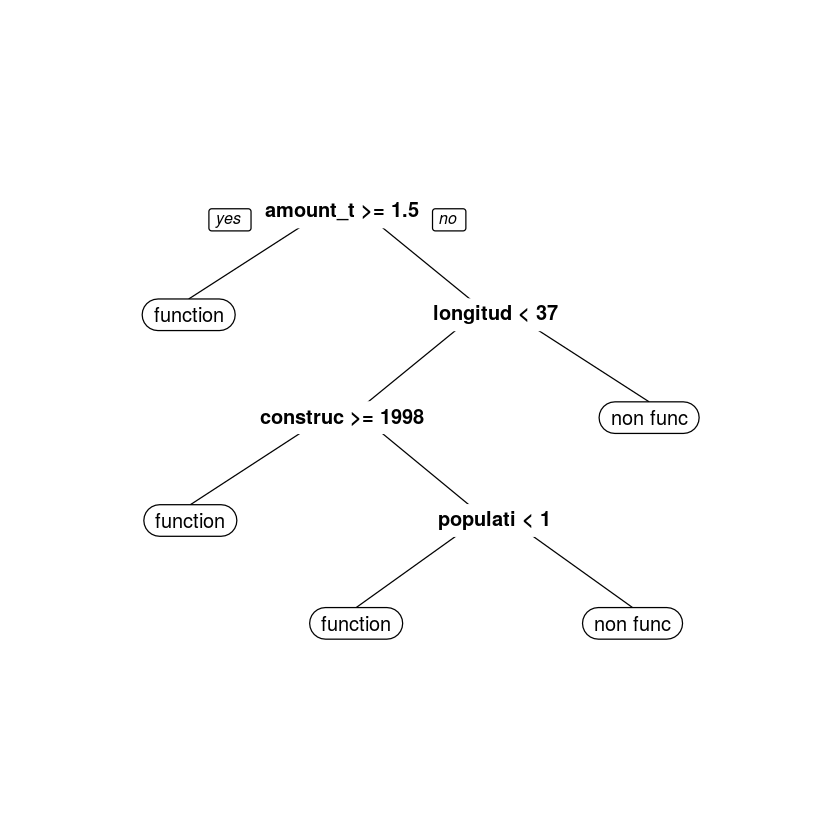

In [14]:

library(rpart)
library(rpart.plot)

data_train

# example model 

#DS <- cbind(X, functionnal=Y)
#data_train doit encore être défini data input + status_group

model<- rpart(status_group~., data= data_train, method = 'class') # what we need to change according of the model

prp(model)

predict_unseen <- predict(model,test_set_values, type = 'class')

status_group <-predict_unseen

data_predict <- test_set_values


data_predict <- cbind(data_predict[1],status_group)

data_predict

#write.csv(data_predict,"decisionTree.csv",row.names = FALSE)







We will also try to make the prediction with neural networks.

In [15]:
install.packages("nnet")

Installing package into ‘/home/pdefraene/R/x86_64-pc-linux-gnu-library/3.4’
(as ‘lib’ is unspecified)



In [28]:
library(nnet)

data_train

# example model 

#DS <- cbind(X, functionnal=Y)
#data_train doit encore être défini data input + status_group

model<- nnet(status_group~., data= data_train, size = 8, decay=5e-4, maxit=200) # what we need to change according of the model


predict_unseen <- predict(model,test_set_values, type= 'class')

status_group <-predict_unseen

data_predict <- test_set_values


data_predict <- cbind(data_predict[1],status_group)

data_predict

table(data_predict["status_group"] == "functional")

write.csv(data_predict,"NeuralNetwork.csv",row.names = FALSE)

id,amount_tsh,gps_height,longitude,latitude,num_private,region_code,district_code,population,construction_year,status_group
<int>,<dbl>,<int>,<dbl>,<dbl>,<int>,<int>,<int>,<int>,<int>,<fct>
69572,6000,1390,34.93809,-9.856322,0,11,5,109,1999,functional
8776,0,1399,34.69877,-2.147466,0,20,2,280,2010,functional
34310,25,686,37.46066,-3.821329,0,21,4,250,2009,functional
67743,0,263,38.48616,-11.155298,0,90,63,58,1986,non functional
19728,0,0,31.13085,-1.825359,0,18,1,0,0,functional
⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮
60739,10,1210,37.16981,-3.253847,0,3,5,125,1999,functional
27263,4700,1212,35.24999,-9.070629,0,11,4,56,1996,functional
37057,0,0,34.01709,-8.750434,0,12,7,0,0,functional


# weights:  115
initial  value 57769.117076 
iter  10 value 53883.077652
iter  20 value 52933.267600
iter  30 value 52650.010714
iter  40 value 52398.343714
iter  50 value 52029.330802
iter  60 value 51946.785020
iter  70 value 51925.980334
iter  80 value 51851.316627
iter  90 value 51731.909808
iter 100 value 51695.324932
iter 110 value 51622.363300
iter 120 value 51568.654837
iter 130 value 51333.522998
iter 140 value 51274.116688
iter 150 value 51220.895110
iter 160 value 51144.281305
iter 170 value 51057.086664
iter 180 value 50947.544590
iter 190 value 50892.261653
iter 200 value 50567.255968
final  value 50567.255968 
stopped after 200 iterations


id,status_group
<int>,<fct>
50785,functional
51630,functional
17168,functional
45559,non functional
49871,functional
⋮,⋮
39307,non functional
18990,functional
28749,non functional



FALSE  TRUE 
 3205 11645 

We will also look after the lazy model

In [23]:
install.packages('lazy')

Installing package into ‘/home/pdefraene/R/x86_64-pc-linux-gnu-library/3.4’
(as ‘lib’ is unspecified)



In [18]:
library(lazy)

model<- lazy(status_group~., data= data_train) # what we need to change according of the model


predict_unseen <- predict(model,test_set_values, type = 'class')

predict_unseen

status_group <-predict_unseen

data_predict <- test_set_values


data_predict <- cbind(data_predict[1],status_group)

#table(data_predict["status_group"] == "functional")

data_predict

#write.csv(data_predict,"lazy.csv",row.names = FALSE)

Warning message in model.response(mf, "numeric"):
“using type = "numeric" with a factor response will be ignored”


$h
    [1]  2.256033e+00  1.451232e+00  1.593270e+00  2.625889e+00  1.405512e+00
    [6]  2.062527e+00  1.262095e+00  2.883027e+00  2.706023e+00  1.186072e+00
   [11]  1.234767e+00  2.172934e+00  1.800586e+00  1.998829e+00  1.753767e+00
   [16]  1.102342e+00  4.303366e+00  2.636744e+00  1.712346e+00  2.750272e+00
   [21]  1.265109e+00  1.802116e+00  2.170777e+00  2.792718e+00  1.723882e+00
   [26]  1.488572e+00  1.999730e+00  1.923934e+00  1.669911e+00  1.898247e+00
   [31]  8.289133e-01  1.757245e+00  2.002850e+00  1.320915e+00  1.875846e+00
   [36]  8.699608e-01  3.240505e+00  1.056653e-01  2.391197e+00  1.652531e+00
   [41]  2.420578e+00  2.313483e+00  1.949600e+00  1.831917e+00  1.983888e+00
   [46]  2.000558e+00  1.882740e+00  1.711317e+00  2.010995e+00  1.730091e+00
   [51]  1.612051e+00  2.704038e+00  1.347822e+00  2.149126e+00  2.030057e+00
   [56]  1.319440e+00  1.320715e+00  2.759919e+00  1.882551e+00  1.223367e+00
   [61]  1.915810e+00  1.873614e+00  1.234131e+00  2.154308e+00  2.621588e+00
   [66]  1.222018e+00  2.422164e+00  2.832370e+00  1.422096e+00  1.350262e+00
   [71]  2.480368e+00  2.332361e+00  1.490627e+00  1.232483e+00  2.809792e+00
   [76]  1.857678e+00 -3.078082e-01  1.409359e+00  1.597287e+00  2.440688e+00
   [81]  1.176491e+00  1.379312e+00  1.943611e+00  1.858622e+00  1.356218e+00
   [86]  2.075810e+00  1.763892e+00  1.790960e+00  2.906471e+00  1.710784e+00
   [91]  1.299484e+00  1.553772e+00  2.341494e+00  3.314438e+00  8.491127e-01
   [96]  2.046362e+00  1.608546e+00  1.135394e+00  1.882774e+00  1.816238e+00
  [101]  2.603907e+00  1.795521e+00  1.621933e+00  1.644359e+00  2.474367e+00
  [106]  1.699819e+00  1.809687e+00  2.079816e+00  1.786093e+00  2.220818e+00
  [111]  1.726820e+00  1.680447e+00  1.215734e+00  1.321150e+00  1.731341e+00
  [116]  2.392848e+00  2.314334e+00  1.723575e+00  2.243910e+00  1.839761e+00
  [121]  2.308610e+00  1.630176e+00  3.041654e+00  1.814990e+00  1.333941e+00
  [126]  1.558788e+00  2.013863e+00  1.270685e+00  2.217351e+00  1.960829e+00
  [131]  8.786914e-01  1.854403e+00  2.018793e+00  3.021957e+00  1.730541e+00
  [136]  2.034409e+00  1.768858e+00  1.956366e+00  1.000471e+00  2.126823e+00
  [141]  1.169414e+00  1.785854e+00  2.421576e+00  2.368278e+00  2.450481e+00
  [146]  1.532978e+00  1.765928e+00  1.996268e+00  1.522135e+00  2.051513e+00
  [151]  2.005974e+00  1.038464e+00  1.513670e+00  1.699768e+00  1.624554e+00
  [156]  2.327483e+00  2.022019e+00  2.163174e+00  5.026266e-01  2.278617e+00
  [161]  1.596349e+00  2.376064e+00  2.891959e+00  2.898445e+00  1.470294e+00
  [166]  2.250244e+00  1.843538e+00  1.378499e+00  1.859412e+00  7.536971e-01
  [171]  1.627950e+00  1.722108e+00  2.370318e+00  1.619320e+00  2.268998e+00
  [176]  2.028833e+00  1.961954e+00  2.877824e+00  1.292112e+00  9.064977e-01
  [181]  3.009108e+00  1.165476e+00  1.572224e+00  1.295500e+00  1.236088e+00
  [186]  2.040312e+00  1.999221e+00  2.277715e+00  1.797658e+00  1.961761e+00
  [191] -1.236997e+00  1.435900e+00  1.505386e+00  9.528452e-01  1.618573e+00
  [196]  2.043173e+00  1.462904e+00  2.522265e+00  1.384803e+00  2.998388e+00
  [201]  2.067808e+00  1.843858e+00  2.058436e+00  2.490999e+00  2.064814e+00
  [206]  1.994906e+00  2.676097e+00  1.839793e+00  2.168090e+00  1.011426e+00
  [211]  1.996947e+00  2.736066e+00  2.462420e+00  2.120552e+00  3.037383e-01
  [216]  1.192885e+00  1.966285e+00  1.409094e+00  9.613116e-01  1.756878e+00
  [221]  2.140390e+00  2.221930e+00  1.857901e+00  1.753426e+00  2.444589e+00
  [226]  1.920151e+00  1.204072e+00  1.397812e+00  1.760176e+00  1.441786e+00
  [231]  2.816089e+00  2.290454e+00  2.118794e+00  2.036349e+00  2.489178e+00
  [236]  1.147944e+00  1.587984e+00  1.104902e+00  1.258273e+00  6.745094e-01
  [241]  1.855568e+00  1.963289e+00  2.511820e+00  1.748688e+00  1.911084e+00
  [246]  1.091933e+00  1.479645e+00  1.846329e+00  7.871979e-01  1.884452e+00
  [251]  1.418007e+00  2.059029e+00  1.817420e+00  1.109190e+00  1.159136e+00
  [256]  1.400133e+

id,h
<int>,<dbl>
50785,2.256033
51630,1.451232
17168,1.593270
45559,2.625889
49871,1.405512
⋮,⋮
39307,2.936066
18990,1.160669
28749,1.167073


# Alternative models





# Conclusions